In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data[:, :]

In [ ]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y = iris.target[:]

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
feature_cols =['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= feature_cols)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df['species'] = np.nan
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,NaN
1,4.9,3.0,1.4,0.2,0.0,NaN
2,4.7,3.2,1.3,0.2,0.0,NaN
3,4.6,3.1,1.5,0.2,0.0,NaN
4,5.0,3.6,1.4,0.2,0.0,NaN


In [ ]:
df['species'] = np.where(df.target==0,'versicolor',df.species)
df['species'] = np.where(df.target==1,'setosa',df.species)
df['species'] = np.where(df.target==2,'virginica',df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,versicolor
1,4.9,3.0,1.4,0.2,0.0,versicolor
2,4.7,3.2,1.3,0.2,0.0,versicolor
3,4.6,3.1,1.5,0.2,0.0,versicolor
4,5.0,3.6,1.4,0.2,0.0,versicolor


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,versicolor
1,4.9,3.0,1.4,0.2,0.0,versicolor
2,4.7,3.2,1.3,0.2,0.0,versicolor
3,4.6,3.1,1.5,0.2,0.0,versicolor
4,5.0,3.6,1.4,0.2,0.0,versicolor


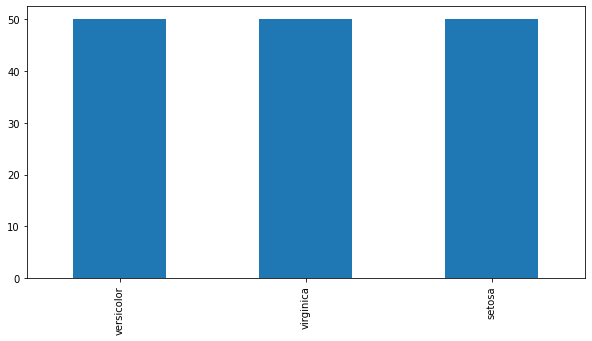

In [ ]:
df['species'].value_counts().plot.bar()

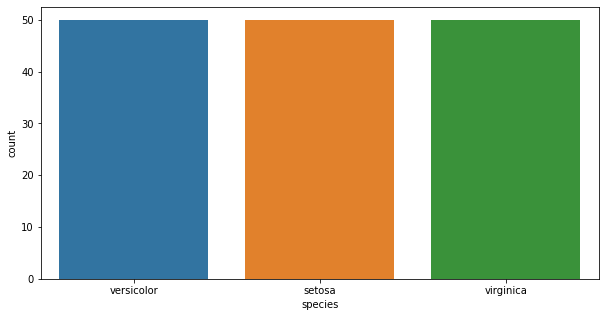

In [ ]:
sns.countplot(x='species', data=df)

In [ ]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_names]
display(X.head())
display(X.shape)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

In [ ]:
feature_target = ['target']
y = df[feature_target]
y.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
y_sc = sc.fit_transform(y)
feature_cols_sc =['SL_SC', 'SW_SC', 'PL_SC', 'PW_SC','TG_SC']
sc_df = pd.DataFrame(data= np.c_[X_sc,y_sc],columns= feature_cols_sc)
feature_cols_scx =['SL_SC', 'SW_SC', 'PL_SC', 'PW_SC']
X_sc = sc_df[feature_cols_scx] 
y_sc = sc_df['TG_SC']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
y_scaler = scaler.fit_transform(y)
feature_cols_scaler =['SL_MM', 'SW_MM', 'PL_MM', 'PW_MM','TG_MM']
scaler_df = pd.DataFrame(data= np.c_[X_scaler,y_scaler],columns= feature_cols_scaler)
feature_cols_scalerx =['SL_MM', 'SW_MM', 'PL_MM', 'PW_MM']
X_scaler = scaler_df[feature_cols_scalerx] 
y_scaler = scaler_df['TG_MM']
display(X.head())
display(y.head())
display(X_sc.head())
display(y_sc.head())
display(X_scaler.head())
display(y_scaler.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,SL_SC,SW_SC,PL_SC,PW_SC
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


0   -1.224745
1   -1.224745
2   -1.224745
3   -1.224745
4   -1.224745
Name: TG_SC, dtype: float64

,SL_MM,SW_MM,PL_MM,PW_MM
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TG_MM, dtype: float64

In [ ]:
display(df.describe())
display(sc_df.describe())
display(scaler_df.describe())

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


,SL_SC,SW_SC,PL_SC,PW_SC,TG_SC
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.184238e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,-1.224745e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,-1.224745e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,0.000000e+00
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,1.224745e+00
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,1.224745e+00


,SL_MM,SW_MM,PL_MM,PW_MM,TG_MM
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.500000
std,0.230018,0.181611,0.299203,0.317599,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y.value_counts()

target
2.0       50
1.0       50
0.0       50
dtype: int64

In [ ]:
display(df.head(1))
display(sc_df.head(1))
display(scaler_df.head(1))


,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,versicolor


,SL_SC,SW_SC,PL_SC,PW_SC,TG_SC
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745


,SL_MM,SW_MM,PL_MM,PW_MM,TG_MM
0,0.222222,0.625,0.067797,0.041667,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

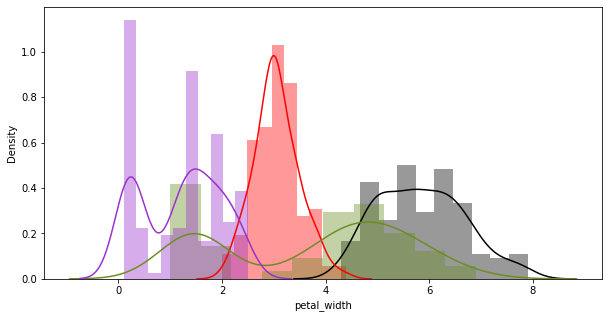

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
#plt.subplot(2,2,1)
sns.distplot(X.sepal_length, bins=10, label='sepal_length', color='black')
#plt.subplot(2,2,2)
sns.distplot(X.sepal_width, bins=10, label='sepal_width', color='red')
#plt.subplot(2,2,3)
sns.distplot(X.petal_length, bins=10, label='petal_length', color='olivedrab')
#plt.subplot(2,2,4)
sns.distplot(X.petal_width, bins=10, label='petal_width', color='darkorchid')

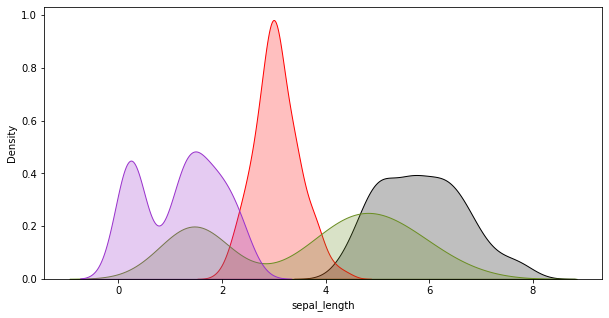

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
#plt.subplot(2,2,1)
sns.kdeplot(X.sepal_length, label='sepal_length', color='black', shade=True)
#plt.subplot(2,2,2)
sns.kdeplot(X.sepal_width, label='sepal_width', color='red', shade=True)
#plt.subplot(2,2,3)
sns.kdeplot(X.petal_length, label='petal_length', color='olivedrab', shade=True)
#plt.subplot(2,2,4)
sns.kdeplot(X.petal_width, label='petal_width', color='darkorchid', shade=True)

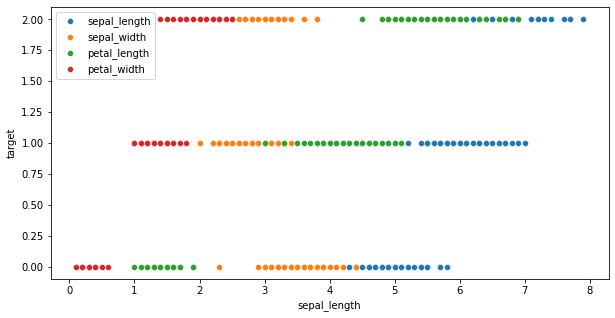

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
#plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length',y='target',data=df,label='sepal_length')
#plt.subplot(2,2,2)
sns.scatterplot(x='sepal_width',y='target',data=df,label='sepal_width')
#plt.subplot(2,2,3)
sns.scatterplot(x='petal_length',y='target',data=df,label='petal_length')
#plt.subplot(2,2,4)
sns.scatterplot(x='petal_width',y='target',data=df,label='petal_width')
plt.legend(loc='best')

Text(0.5, 0, 'Z Axis')

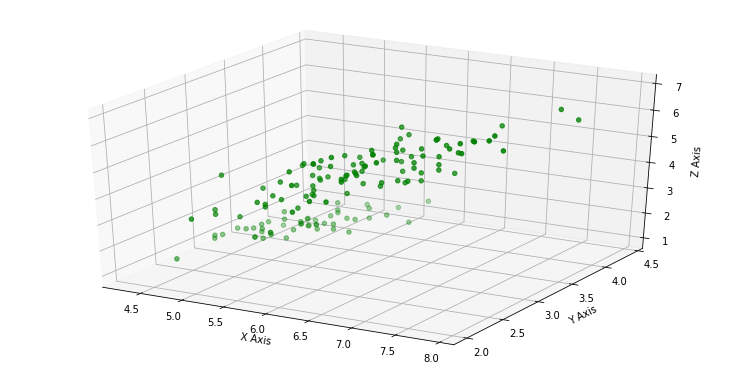

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

#ax = plt.axes(projection='3d')
ax.scatter(X.sepal_length, X.sepal_width,X.petal_length, color='green', marker='o')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

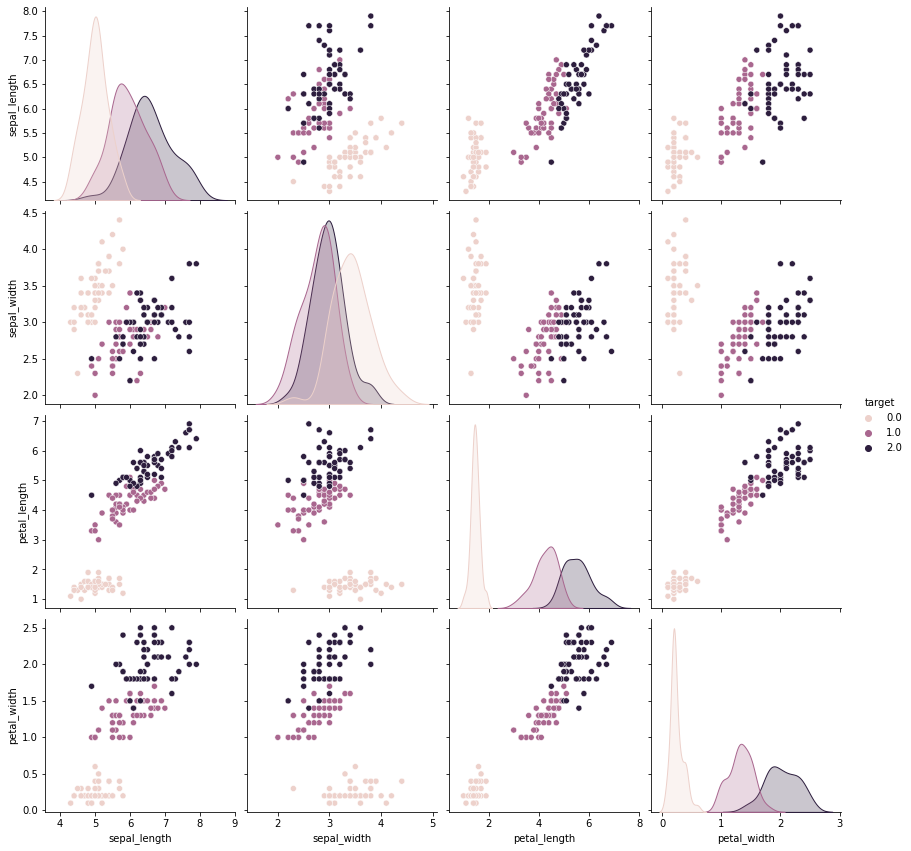

In [ ]:
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target']
sns.pairplot(df[columns],hue='target',height=3.0)

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.00,-0.12,0.87,0.82,0.78
sepal_width,-0.12,1.00,-0.43,-0.37,-0.43
petal_length,0.87,-0.43,1.00,0.96,0.95
petal_width,0.82,-0.37,0.96,1.00,0.96
target,0.78,-0.43,0.95,0.96,1.00


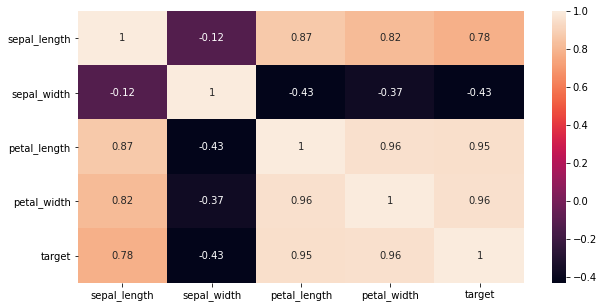

In [ ]:
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target']
corr_val = df[columns].corr().round(2)
display(corr_val)
sns.heatmap(corr_val,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier()
X_train,X_test,y_tain,y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
(label,count) = np.unique(df.species,return_counts=True)
freq = np.asarray((label,count)).T
print(freq)

[['setosa' 50]
 ['versicolor' 50]
 ['virginica' 50]]


# Cross Validation

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
csv_old = cross_val_score(model,X,y,cv=4)
csv2_StandardScaler = cross_val_score(model,X_sc,y,cv=4)
csv3_MinMaxScaler = cross_val_score(model,X_scaler,y,cv=4)

In [ ]:
print("Old =>",csv_old.mean().round(4))
print("StandardScaler =>",csv2_StandardScaler.mean().round(4))
print("MinMaxScaler =>",csv3_MinMaxScaler.mean().round(4))

In [ ]:
print("X_train =>",X_train.shape)
print("X_test =>",X_test.shape)
print("y_tain =>",y_tain.shape)
print("y_test =>",y_test.shape)


In [ ]:
model.fit(X_train,y_tain)

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score -> {:.3f}' . format(model.score(X_test, y_test)))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(3))
class_names = iris.target_names

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=feature_names,  
                           class_names=class_names, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
tree.plot_tree(model) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris")  #output file iris.pdf

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                    feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
# ลองสร้างกราฟSin(x)
x = np.arange(start=0, stop = 3*np.pi, step = 0.1)
y = np.sin(x)

plt.plot(x, y, label='Graph Sin(x)')
plt.legend()
plt.title('Graph Sin(x)')

In [ ]:
# ลองสร้างกราฟSin(x)
x = np.arange(start=0, stop = 10*np.pi, step = 0.01)
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x)
plt.plot(x, y_sin, label='Graph Sin(x)')
plt.plot(x, y_cos,label='Graph Cos(x)')
#plt.plot(x, y_tan,label='Graph Tan(x)')
plt.legend()
plt.title('Graph Sin(x)')

In [ ]:
x = [1,2,3]
y = [4,5,6]
plt.plot(x, y, linewidth=1.0,alpha=0.5)

In [ ]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
plt.show()

In [ ]:
x = np.linspace(0, 5, 100)
x

In [ ]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(x) ))

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

x_random = np.random.normal(0, 2, 10000)

x = np.linspace( -5, 5, 10000 )
y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution

import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(x_random, bins='auto')
ax1.set_title('probability density (random)')
ax2.hist(y, bins='auto')
ax2.set_title('(your dataset)')
plt.tight_layout()

0 (0, 'No skew') 0
1 (4, 'Positive skew') 4
2 (-4, 'Negative skew') -4


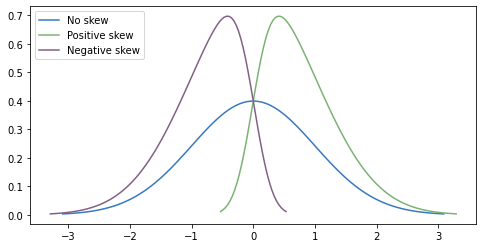

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm

f = plt.figure(figsize=(8,4))
ax = f.add_subplot(111)

colors = ["windows blue", "faded green", "dusty purple"]
colors = sns.xkcd_palette(colors)
b = 4
for j, a in enumerate([(0, 'No skew'), (b, 'Positive skew'), (-b, 'Negative skew')]):    
    x = np.linspace(skewnorm.ppf(0.001, a[0]), skewnorm.ppf(0.999, a[0]), 100)
    y = skewnorm.pdf(x, a[0])
    ax.plot(x, y, label=a[1], color=colors[j])
    print(j,a, a[0])
#ax.yaxis.set_visible(False)
plt.legend(loc=2)
#sns.despine(left=True)

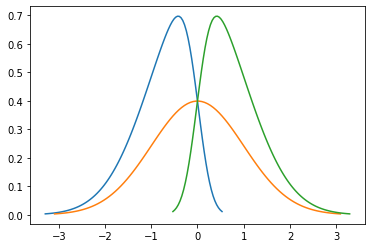

In [36]:
x = np.linspace(skewnorm.ppf(0.001, -4), skewnorm.ppf(0.999, -4), 100)
y = skewnorm.pdf(x, -4)
plt.plot(x, y, label=a[1])
x = np.linspace(skewnorm.ppf(0.001, 0), skewnorm.ppf(0.999, 0), 100)
y = skewnorm.pdf(x, 0)
plt.plot(x, y, label=a[1])
x = np.linspace(skewnorm.ppf(0.001, 4), skewnorm.ppf(0.999, 4), 100)
y = skewnorm.pdf(x, 4)
plt.plot(x, y, label=a[1])